In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_data(filename):
    with open(filename, 'r', encoding='cp1252') as file:
        lines = file.readlines()

    # 创建字典来存储参数
    parameters = {}

    # 逐行读取文件内容
    for line in lines:
        # 去除行首尾的空白符
        line = line.strip()
        # 忽略空行和注释行
        if not line or line.startswith('#'):
            continue
        # 如果行包含等号，则将其解析为键值对
        if '=' in line:
            key, value = line.split('=')
            parameters[key.strip()] = value.strip()

    # 读取数据表格
    data_start = False
    # data = []
    times, hfs, amps = [], [], []

    for line in lines:
        if line.startswith("Depth ["):
            data_start = True
            continue
        if data_start and line.strip():
            # data.append(line.strip().split())
            time, hf, amp = line.strip().split()
            times.append(float(time))
            hfs.append(float(hf))
            amps.append(float(amp))

    # # 打印参数
    # print("[front_panel] Parameters:")
    # for key, value in parameters.items():
    #     print(f"{key}: {value}")

    return times, hfs, amps

找出每張圖需要fft的範圍
然後把peak分開，ifft，看能不能看出什麼
試試看算phase velocty

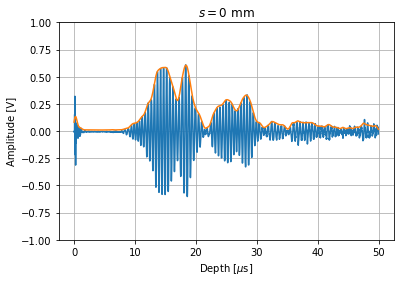

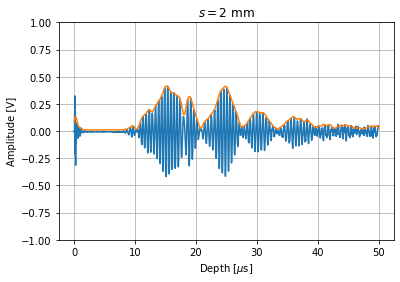

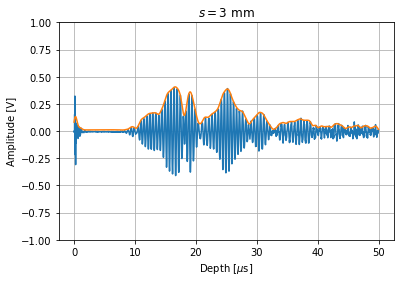

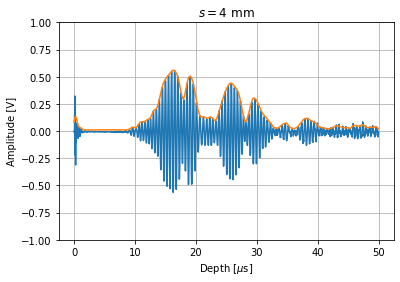

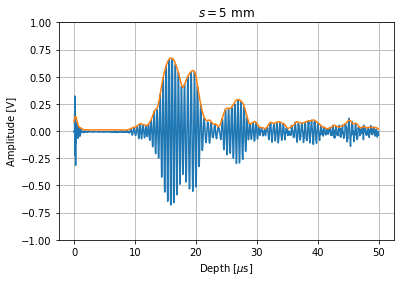

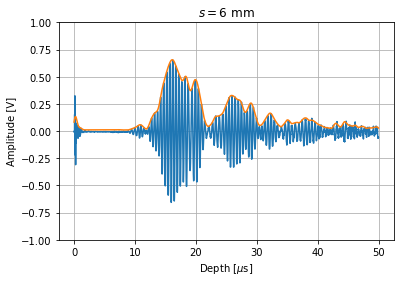

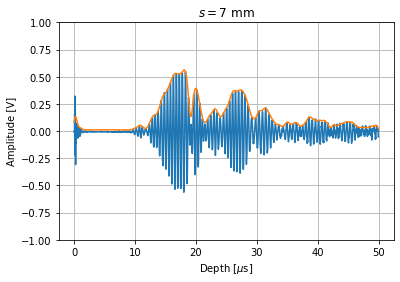

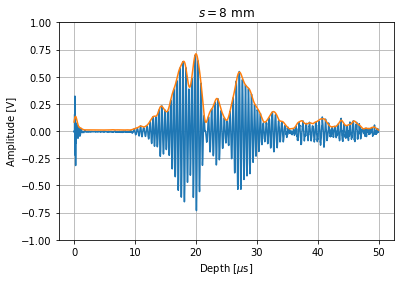

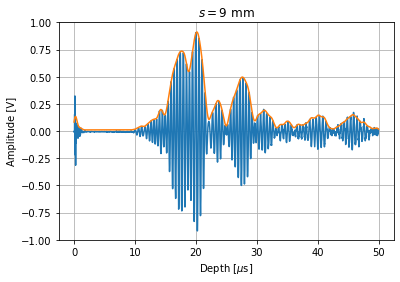

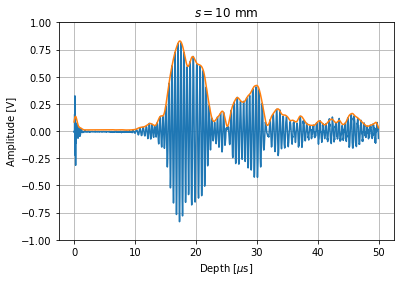

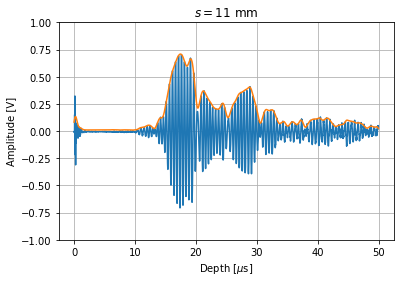

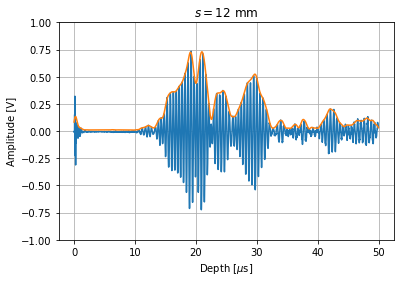

In [12]:
for i in range(13):
    if i == 1: continue
    times, hfs, amps = get_data(str(i)+'.dat')
    plt.figure()
    plt.plot(times, hfs, label = 'signal')
    plt.plot(times, amps, label = 'envelope')
    plt.ylim(-1,1)
    
    plt.title(rf'$s=${i} mm')

    plt.xlabel(r'Depth [$\mu$s]')
    plt.ylabel(r'Amplitude [V]')
    plt.grid()
    plt.savefig(str(i)+'.png')